In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('./df.csv')

In [6]:
df

,연도,구,소계,버스,지하철,택시,자동차_대수,자동차_증감
0,2021,종로구,141759969,57821751,75771163,8167055,50049,-11.0
1,2021,중구,149856039,39190006,100938579,9727454,53107,1947.0
2,2021,용산구,87031985,43905878,32335411,10790696,79486,3005.0
3,2021,성동구,96087425,31552270,56470250,8064905,106435,905.0
4,2021,광진구,95731490,29859594,56633974,9237922,98658,-114.0
...,...,...,...,...,...,...,...,...
95,2024,관악구,191528043,91648849,92102308,7776886,117936,-950.0
96,2024,서초구,225955483,81739104,130172545,14043834,176628,491.0
97,2024,강남구,322927844,111266706,179953430,31707708,256099,5654.0
98,2024,송파구,208052956,71926631,120662352,15463973,244079,-1518.0


In [5]:
df[['버스', '지하철']].corr()

,버스,지하철
버스,1.000000,0.554941
지하철,0.554941,1.000000


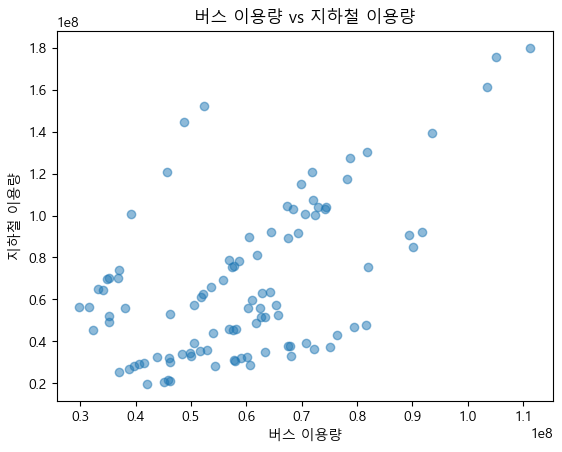

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(df['버스'], df['지하철'], alpha=0.5)
plt.xlabel('버스 이용량')
plt.ylabel('지하철 이용량')
plt.title('버스 이용량 vs 지하철 이용량')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['버스']]
y = df['지하철']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))

Train R²: 0.35291643845359577
Test R²: 0.10802838353799837


In [11]:
import numpy as np
from sklearn.metrics import r2_score

baseline_pred = np.repeat(y_train.mean(), len(y_test))
print("Baseline R2:", r2_score(y_test, baseline_pred))

Baseline R2: -6.874251147936938e-05
